In [29]:
import pandas as pd
import numpy as np

df=pd.read_csv('Housing.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


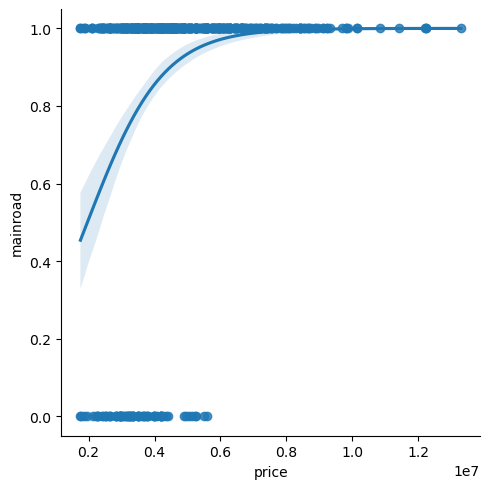

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df['mainroad'] = df['mainroad'].str.strip().str.lower()
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})

sns.lmplot(x ='price', y ='mainroad', data = df , logistic=True)
plt.show()

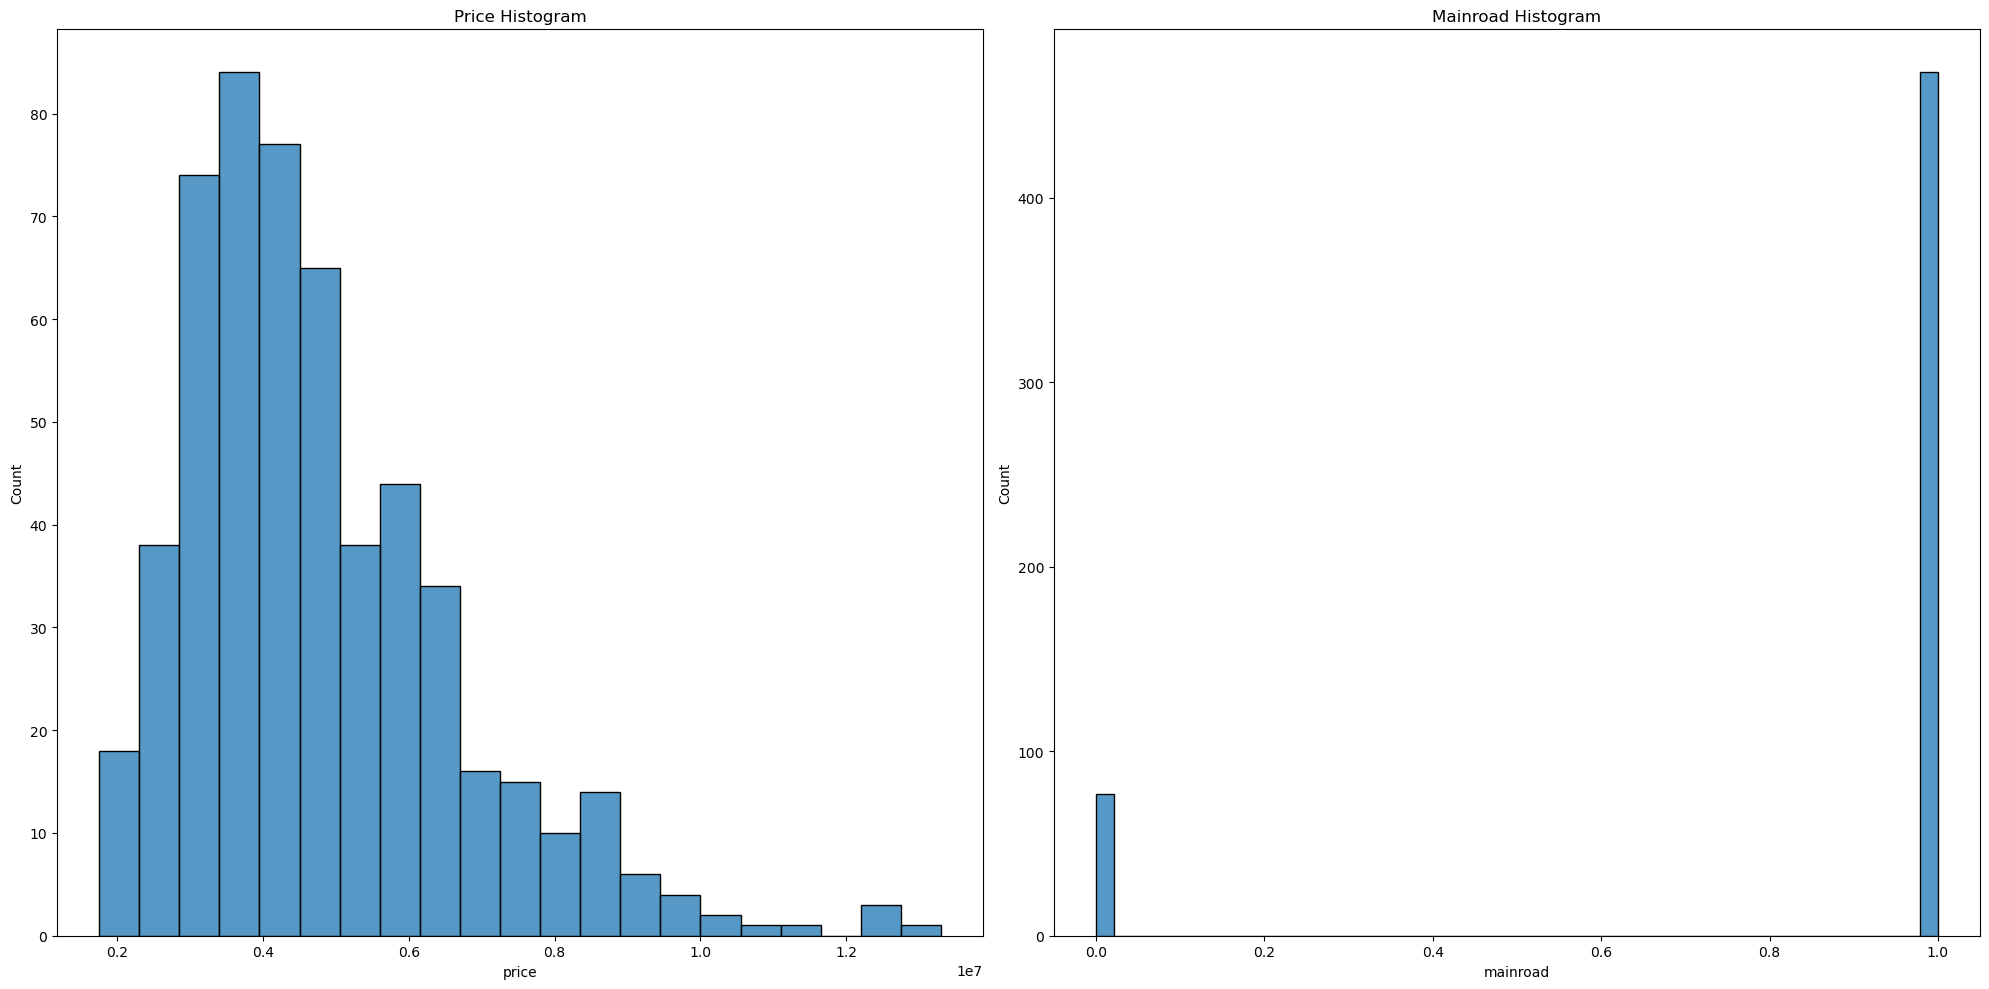

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.histplot(df['price'])
plt.title('Price Histogram')

plt.subplot(1,2,2)
sns.histplot(df['mainroad'])
plt.title('Mainroad Histogram')

plt.tight_layout()
plt.show()

In [14]:
X = df.drop(columns=['mainroad'])
y = df['mainroad']


In [15]:
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("\nAfter encoding, feature shape:", X.shape)


After encoding, feature shape: (545, 13)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = X_train.columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [22]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8623853211009175

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.13      0.21        15
           1       0.88      0.98      0.92        94

    accuracy                           0.86       109
   macro avg       0.69      0.56      0.57       109
weighted avg       0.82      0.86      0.83       109



In [26]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[ 2 13]
 [ 2 92]]


In [27]:
auc = roc_auc_score(y_test, y_prob)
print("\nROC AUC:", auc)


ROC AUC: 0.8404255319148937


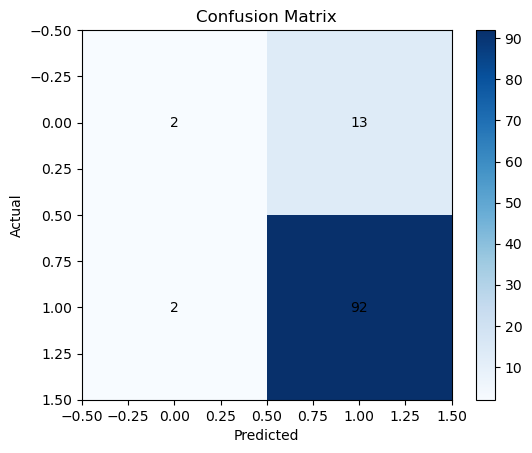

In [30]:
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center')
plt.show()

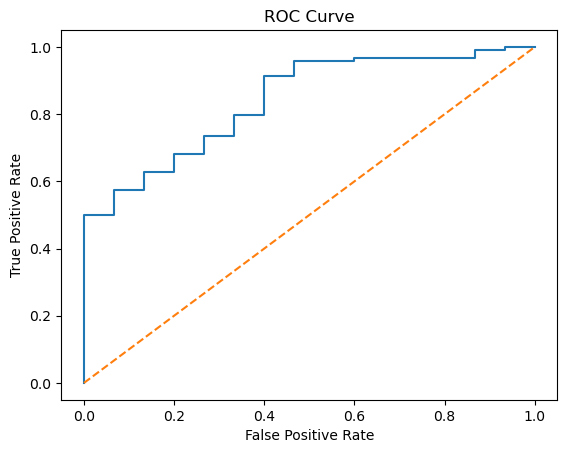

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()